In [ ]:
!pip install langchain
!pip install langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8


In [ ]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 10.5 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
os.environ['groc_key'] = userdata.get('groc_key')
os.environ['LANGSMITH_API_KEY'] = userdata.get('smith')
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'langgraph_project'
groc_key = os.environ.get('groc_key')

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groc_key,model_name='Gemma2-9b-It')

In [ ]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e147c281ab0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e147c281900>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

In [ ]:
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [ ]:
graph_builder=StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return{"messages":llm.invoke(state["messages"])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

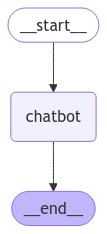

In [ ]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [ ]:
while True:
  user_input=input("user:  ")
  if user_input.lower() in ["quit","q"]:
    print("good bye")
    break
  for event in graph.stream({"messages":("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("assistant:",value["messages"].content)

user:  hi
dict_values([{'messages': AIMessage(content='Hi there! 👋 \n\nHow can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.9e-07, 'queue_time': 0.014271461000000001, 'total_time': 0.030909481}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb306418-26f1-49cb-a325-d9279a63dc08-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})}])
content='Hi there! 👋 \n\nHow can I help you today? 😄\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.9e-07, 'queue_time': 0.014271461000000001, 'total_time': 0.030909481}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} i